In [1]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os

## Lets Talk About Lunar Data At The First

## Exploring The Catalog(The List Of The Files)

In [4]:
path = r"/Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv"
data = pd.read_csv(path)
data

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


## Some Description: 
### 1.EVID is the Event Id
### 2.MQ stands for Mars Quake
### 3.Time Relative And Time Absolute Here Stands For The Time When Actually The Quake Started

In [6]:
file_name = data['filename']
file_name

0     xa.s12.00.mhz.1970-01-19HR00_evid00002
1     xa.s12.00.mhz.1970-03-25HR00_evid00003
2     xa.s12.00.mhz.1970-03-26HR00_evid00004
3     xa.s12.00.mhz.1970-04-25HR00_evid00006
4     xa.s12.00.mhz.1970-04-26HR00_evid00007
                       ...                  
71    xa.s12.00.mhz.1974-10-14HR00_evid00156
72    xa.s12.00.mhz.1975-04-12HR00_evid00191
73    xa.s12.00.mhz.1975-05-04HR00_evid00192
74    xa.s12.00.mhz.1975-06-24HR00_evid00196
75    xa.s12.00.mhz.1975-06-26HR00_evid00198
Name: filename, Length: 76, dtype: object

## Let's Explore With The First File Name 

In [8]:
file_name[0]

'xa.s12.00.mhz.1970-01-19HR00_evid00002'

# Let's Get The Csv File Corresponding To The First File Name

In [10]:
data_directory = '/Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA'
csv_file = f'{data_directory}/{file_name[0]}.csv'
data_cat = pd.read_csv(csv_file)
data_cat

,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),velocity(m/s)
0,1970-01-19T00:00:00.665000,0.000000,-6.153279e-14
1,1970-01-19T00:00:00.815943,0.150943,-7.701288e-14
2,1970-01-19T00:00:00.966887,0.301887,-8.396187e-14
3,1970-01-19T00:00:01.117830,0.452830,-8.096155e-14
4,1970-01-19T00:00:01.268774,0.603774,-7.097599e-14
...,...,...,...
572410,1970-01-20T00:00:02.174434,86401.509434,-1.472713e-14
572411,1970-01-20T00:00:02.325377,86401.660377,-1.956104e-14
572412,1970-01-20T00:00:02.476321,86401.811321,-2.240307e-14
572413,1970-01-20T00:00:02.627264,86401.962264,-2.998405e-14


## Note: Here Also We Can See The TIme Relative And Time Absolute Which Denotes Each And Every Time Step And The Change In Velocity Corresponding To That Time Step

# For The Time Being Let's Consider Relative Time And Plot The Data 

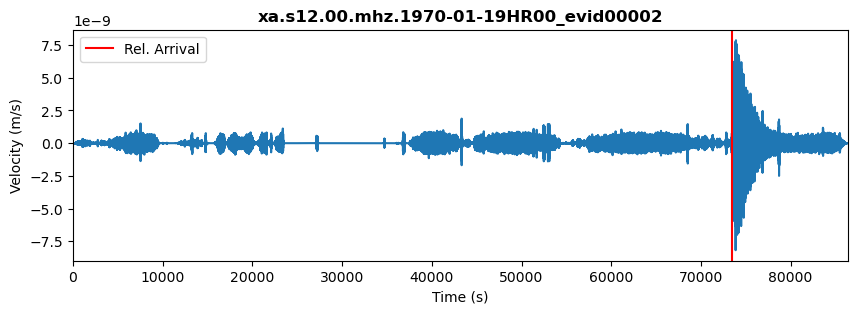

In [13]:
# Read in time steps and velocities
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

# Plot the trace! 
fig,ax = plt.subplots(1,1,figsize=(10,3))
ax.plot(csv_times,csv_data)

# Make the plot pretty
ax.set_xlim([min(csv_times),max(csv_times)])
ax.set_ylabel('Velocity (m/s)')
ax.set_xlabel('Time (s)')
ax.set_title(f'{file_name[0]}', fontweight='bold')

# Plot where the arrival time is
arrival_line = ax.axvline(x=data.iloc[0]['time_rel(sec)'], c='red', label='Rel. Arrival')
ax.legend(handles=[arrival_line])

## Note: Arrival Line Time Is Coming From The Initial Data Set(Data Frame Named 'data')

# Let's Read The Corresponding Miniseed File

In [16]:
mseed_file = f'{data_directory}/{file_name[0]}.mseed'
read(mseed_file)

1 Trace(s) in Stream:
XA.S12.00.MHZ | 1970-01-19T00:00:00.665000Z - 1970-01-20T00:00:02.778208Z | 6.6 Hz, 572415 samples

In [17]:
st = read(mseed_file)
st[0].stats

         network: XA
         station: S12
        location: 00
         channel: MHZ
       starttime: 1970-01-19T00:00:00.665000Z
         endtime: 1970-01-20T00:00:02.778208Z
   sampling_rate: 6.625
           delta: 0.1509433962264151
            npts: 572415
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1136, 'encoding': 'FLOAT64', 'byteorder': '>', 'record_length': 4096, 'filesize': 4653056})

# Now Let's Extract The Properties For Machine Learning Purpose

In [19]:
csv_times = np.array(data_cat['time_rel(sec)'].tolist())
csv_data = np.array(data_cat['velocity(m/s)'].tolist())

arrival_time = data.iloc[0]['time_rel(sec)']  # Quake starting time

time_to_arrival = csv_times - arrival_time

mean_velocity = np.mean(csv_data)
std_velocity = np.std(csv_data)
max_velocity = np.max(csv_data)
min_velocity = np.min(csv_data)
range_velocity = max_velocity - min_velocity
median_velocity = np.median(csv_data)

rms_velocity = np.sqrt(np.mean(csv_data ** 2))
energy = np.sum(csv_data ** 2)
threshold = np.percentile(csv_data, 95)
impulse_events = csv_data[csv_data > threshold]
impulse_factor = len(impulse_events) / len(csv_data)

velocity_derivative = np.diff(csv_data) / np.diff(csv_times)


window_size = 5 
start_index = np.searchsorted(csv_times, arrival_time - window_size)
end_index = np.searchsorted(csv_times, arrival_time + window_size)

window_data = csv_data[start_index:end_index]
mean_window_velocity = np.mean(window_data)
max_window_velocity = np.max(window_data)

features = {
    'Mean Velocity': mean_velocity,
    'Standard Deviation': std_velocity,
    'Max Velocity': max_velocity,
    'Min Velocity': min_velocity,
    'Range Velocity': range_velocity,
    'Median Velocity': median_velocity,
    'RMS Velocity': rms_velocity,
    'Energy': energy,
    'Impulse Factor': impulse_factor,
    'Velocity Derivative Mean': np.mean(velocity_derivative),
    'Velocity Derivative Std': np.std(velocity_derivative),
    'Mean Velocity Around Arrival': mean_window_velocity,
    'Max Velocity Around Arrival': max_window_velocity,
    'Arrival Time': arrival_time
}

features_df = pd.DataFrame(features, index=[0])
features_df

,Mean Velocity,Standard Deviation,Max Velocity,Min Velocity,Range Velocity,Median Velocity,RMS Velocity,Energy,Impulse Factor,Velocity Derivative Mean,Velocity Derivative Std,Mean Velocity Around Arrival,Max Velocity Around Arrival,Arrival Time
0,-8.443134e-13,3.530056e-10,7.874026e-09,-8.185283e-09,1.605931e-08,-1.633815e-17,3.530066e-10,7.133071e-14,0.05,1.953559e-19,1.617267e-09,-2.976370e-11,1.509733e-09,73500.0


In [20]:
import pandas as pd
import numpy as np

path = r"/Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/catalogs/apollo12_catalog_GradeA_final.csv"
data = pd.read_csv(path)

file_names = data['filename'].tolist()
mq_types = data['mq_type'].tolist()

features_list = []

for name in file_names:
    data_directory = '/Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA'
    csv_file = f'{data_directory}/{name}.csv'  # Use name instead of file_name[0]
    
    try:
        data_cat = pd.read_csv(csv_file)
        
        csv_times = np.array(data_cat['time_rel(sec)'].tolist())
        csv_data = np.array(data_cat['velocity(m/s)'].tolist())
        
        arrival_time = data.iloc[0]['time_rel(sec)']  
        time_to_arrival = csv_times - arrival_time
        
        mean_velocity = np.mean(csv_data)
        std_velocity = np.std(csv_data)
        max_velocity = np.max(csv_data)
        min_velocity = np.min(csv_data)
        range_velocity = max_velocity - min_velocity
        median_velocity = np.median(csv_data)
        rms_velocity = np.sqrt(np.mean(csv_data ** 2))
        energy = np.sum(csv_data ** 2)
        
        threshold = np.percentile(csv_data, 95)
        impulse_events = csv_data[csv_data > threshold]
        impulse_factor = len(impulse_events) / len(csv_data)
        
        velocity_derivative = np.diff(csv_data) / np.diff(csv_times)
        
        window_size = 5  # seconds
        start_index = np.searchsorted(csv_times, arrival_time - window_size)
        end_index = np.searchsorted(csv_times, arrival_time + window_size)
        
        window_data = csv_data[start_index:end_index]
        mean_window_velocity = np.mean(window_data)
        max_window_velocity = np.max(window_data)

        features = {
            'File Name': name,  
            'Mean Velocity': mean_velocity,
            'Standard Deviation': std_velocity,
            'Max Velocity': max_velocity,
            'Min Velocity': min_velocity,
            'Range Velocity': range_velocity,
            'Median Velocity': median_velocity,
            'RMS Velocity': rms_velocity,
            'Energy': energy,
            'Impulse Factor': impulse_factor,
            'Velocity Derivative Mean': np.mean(velocity_derivative) if len(velocity_derivative) > 0 else np.nan,
            'Velocity Derivative Std': np.std(velocity_derivative) if len(velocity_derivative) > 0 else np.nan,
            'Mean Velocity Around Arrival': mean_window_velocity,
            'Max Velocity Around Arrival': max_window_velocity,
            'Arrival Time': arrival_time
        }

        features_list.append(features)

    except FileNotFoundError:
        print(f"File not found: {csv_file}. Skipping this file.") 
    except Exception as e:
        print(f"An error occurred while processing {csv_file}: {e}")

features_df = pd.DataFrame(features_list)

mq_types_df = pd.DataFrame({'File Name': file_names, 'mq_type': mq_types})

combined_df = pd.merge(features_df, mq_types_df, on='File Name', how='left')

combined_df

File not found: /Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-13HR00_evid00029.csv. Skipping this file.


/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


An error occurred while processing /Users/arneshbanerjee/Coding/Hackathon/nasa2024/Seismic/space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1973-03-13HR00_evid00094.csv: zero-size array to reduction operation maximum which has no identity


,File Name,Mean Velocity,Standard Deviation,Max Velocity,Min Velocity,Range Velocity,Median Velocity,RMS Velocity,Energy,Impulse Factor,Velocity Derivative Mean,Velocity Derivative Std,Mean Velocity Around Arrival,Max Velocity Around Arrival,Arrival Time,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,-8.443134e-13,3.530056e-10,7.874026e-09,-8.185283e-09,1.605931e-08,-1.633815e-17,3.530066e-10,7.133071e-14,0.050000,1.953559e-19,1.617267e-09,-2.976370e-11,1.509733e-09,73500.0,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,-1.939339e-12,3.865137e-10,4.707866e-09,-4.603228e-09,9.311095e-09,1.764188e-12,3.865185e-10,8.551625e-14,0.050001,2.328535e-20,1.300470e-09,2.869342e-11,8.028672e-10,73500.0,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,-2.980386e-13,3.219582e-10,5.969005e-09,-6.144452e-09,1.211346e-08,3.116433e-16,3.219583e-10,5.933450e-14,0.050001,1.108428e-19,1.377912e-09,-7.111081e-11,3.978438e-09,73500.0,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,-1.547089e-13,3.383782e-10,6.853803e-09,-6.155705e-09,1.300951e-08,3.515417e-14,3.383782e-10,6.554142e-14,0.050000,-7.893605e-20,1.571516e-09,-3.392656e-12,4.175311e-10,73500.0,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,-6.921802e-13,3.009879e-10,5.491012e-09,-4.475551e-09,9.966563e-09,-3.369827e-13,3.009887e-10,5.185712e-14,0.050001,2.121393e-20,1.254288e-09,-1.387347e-11,4.500003e-10,73500.0,deep_mq
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,xa.s12.00.mhz.1974-10-14HR00_evid00156,-7.625121e-13,2.674855e-10,5.994249e-09,-6.890003e-09,1.288425e-08,-3.282075e-15,2.674866e-10,4.095598e-14,0.050000,1.458979e-21,1.311422e-09,-7.708328e-12,2.030632e-10,73500.0,impact_mq
70,xa.s12.00.mhz.1975-04-12HR00_evid00191,-3.119208e-12,2.257003e-09,6.101882e-08,-6.701207e-08,1.280309e-07,1.155721e-15,2.257005e-09,2.915963e-12,0.050001,-1.390345e-19,1.123896e-08,-1.673393e-11,6.459676e-10,73500.0,impact_mq
71,xa.s12.00.mhz.1975-05-04HR00_evid00192,-6.893979e-12,4.731551e-09,1.122859e-07,-1.078822e-07,2.201681e-07,4.451727e-12,4.731556e-09,1.281508e-11,0.050000,2.567758e-21,2.005329e-08,4.863785e-11,5.611433e-10,73500.0,impact_mq
72,xa.s12.00.mhz.1975-06-24HR00_evid00196,3.233473e-13,2.872242e-10,1.199012e-08,-1.173117e-08,2.372129e-08,1.064287e-13,2.872244e-10,4.722268e-14,0.050001,-1.543768e-20,1.107912e-09,-5.767059e-12,3.866764e-10,73500.0,impact_mq


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


print(combined_df.head())


X = combined_df.drop(columns=['mq_type', 'File Name', 'Arrival Time'])
y = combined_df['mq_type']

X = pd.get_dummies(X)

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_validation)

print("Accuracy:", accuracy_score(y_validation, y_pred))
print("\nClassification Report:\n", classification_report(y_validation, y_pred))

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importance_df)


                                File Name  Mean Velocity  Standard Deviation  \
0  xa.s12.00.mhz.1970-01-19HR00_evid00002  -8.443134e-13        3.530056e-10   
1  xa.s12.00.mhz.1970-03-25HR00_evid00003  -1.939339e-12        3.865137e-10   
2  xa.s12.00.mhz.1970-03-26HR00_evid00004  -2.980386e-13        3.219582e-10   
3  xa.s12.00.mhz.1970-04-25HR00_evid00006  -1.547089e-13        3.383782e-10   
4  xa.s12.00.mhz.1970-04-26HR00_evid00007  -6.921802e-13        3.009879e-10   

   Max Velocity  Min Velocity  Range Velocity  Median Velocity  RMS Velocity  \
0  7.874026e-09 -8.185283e-09    1.605931e-08    -1.633815e-17  3.530066e-10   
1  4.707866e-09 -4.603228e-09    9.311095e-09     1.764188e-12  3.865185e-10   
2  5.969005e-09 -6.144452e-09    1.211346e-08     3.116433e-16  3.219583e-10   
3  6.853803e-09 -6.155705e-09    1.300951e-08     3.515417e-14  3.383782e-10   
4  5.491012e-09 -4.475551e-09    9.966563e-09    -3.369827e-13  3.009887e-10   

         Energy  Impulse Factor  Veloc

/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_validation)
print("SVM Accuracy:", accuracy_score(y_validation, y_pred_svm))
print("\nClassification Report (SVM):\n", classification_report(y_validation, y_pred_svm))

SVM Accuracy: 0.8666666666666667

Classification Report (SVM):
               precision    recall  f1-score   support

     deep_mq       0.00      0.00      0.00         2
   impact_mq       0.87      1.00      0.93        13

    accuracy                           0.87        15
   macro avg       0.43      0.50      0.46        15
weighted avg       0.75      0.87      0.80        15



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from keras.models import Sequential
from keras.layers import LSTM, Dense
from xgboost import XGBRegressor
from obspy.signal.trigger import classic_sta_lta, trigger_onset
import matplotlib.pyplot as plt

def arima_forecasting(df, target_column, p=5, d=1, q=0):
    model = ARIMA(df[target_column], order=(p, d, q))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=10)
    
    y_true = df[target_column].iloc[-10:]  # Last 10 values
    mae = mean_absolute_error(y_true, forecast)
    print(f"ARIMA Model MAE: {mae}")
    return forecast, mae

def lstm_forecasting(df, target_column, lag=1):
    data = df[target_column].values
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])
        y.append(data[i])
    
    X, y = np.array(X), np.array(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    model.fit(X_train, y_train, epochs=20, verbose=0)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"LSTM Model MAE: {mae}")
    return y_pred, y_test, mae

def xgboost_forecasting(df, target_column, lag=5):
    df['lag_1'] = df[target_column].shift(1)
    df['lag_2'] = df[target_column].shift(2)
    df['lag_3'] = df[target_column].shift(3)
    df.dropna(inplace=True)

    X = df[['lag_1', 'lag_2', 'lag_3']]
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    print(f"XGBoost Model MAE: {mae}")
    return y_pred, y_test, mae

def sta_lta_trigger_detection(tr_data, df, sta_len, lta_len, thr_on=4, thr_off=1.5):
    df = tr_data.stats.sampling_rate

    cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))

    on_off = np.array(trigger_onset(cft, thr_on, thr_off))


    
    return on_off

# Example usage:
# For ARIMA model
# arima_forecast, arima_mae = arima_forecasting(df, target_column='signal')

# For LSTM model
# lstm_pred, lstm_true, lstm_mae = lstm_forecasting(df, target_column='signal')

# For XGBoost model
# xgb_pred, xgb_true, xgb_mae = xgboost_forecasting(df, target_column='signal')

# STA/LTA analysis on seismic trace data
# trigger_points = sta_lta_trigger_detection(tr_data, df, sta_len=120, lta_len=600)